# Анализ магазина компьютерных игр

Данный проект предполагает исследование интернет-магазина компьютерных игр "Стримчик". Необходимо выявить закономерности, определяющие успешность игр. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цели проекта**

Определить факторы, влияющие на успешность продаваемых игр в интернет-магазине.

**План работы**

1. Изучить данные
2. Выполнить предобработку
3. Исследовательский анализ
4. Портрет пользователя региона
5. Проверить гипотезы
6. Написать общий вывод

Входные данные - **`исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года`**.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Загрузка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# считываем, сохраняем и выводим датасет

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    print('error')

display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
# выводим общую информацию

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


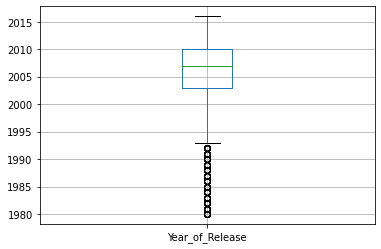

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64


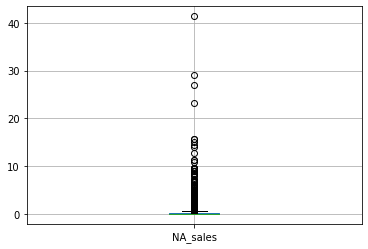

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64


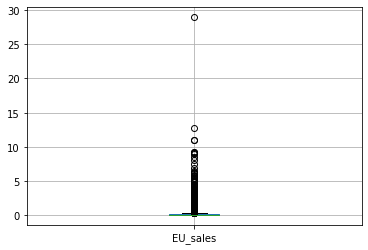

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64


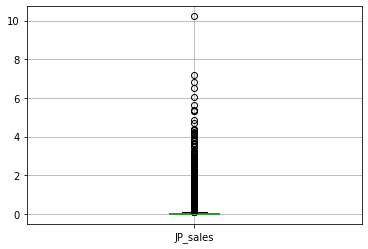

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64


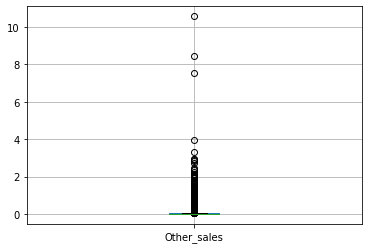

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64


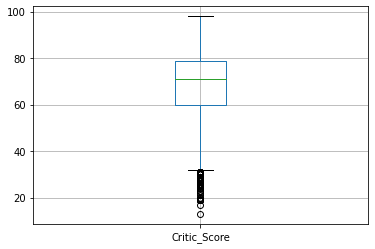

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64


In [ ]:
# проверяем распределение всех столбцов с показателями на наличие аномалий

data.boxplot(column='Year_of_Release')
plt.show()
print(data['Year_of_Release'].describe())

data.boxplot(column='NA_sales')
plt.show()
print(data['NA_sales'].describe())

data.boxplot(column='EU_sales')
plt.show()
print(data['EU_sales'].describe())

data.boxplot(column='JP_sales')
plt.show()
print(data['JP_sales'].describe())

data.boxplot(column='Other_sales')
plt.show()
print(data['Other_sales'].describe())

data.boxplot(column='Critic_Score')
plt.show()
print(data['Critic_Score'].describe())

**Вывод**

- В данных представлено 11 колонок и 16715 строчек
- Присутствуют пропуски в некоторых столбцах
- Указаны неправильные типы данных в некоторых столбцах
- Данные собраны с 1980 по 2016 годы

## Предобработка данных

In [ ]:
# меняем во всех столбцах заглавные буквы для удобства

data.columns = map(str.lower, data.columns)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
# считаем % пропусков от общего количества данных

(len(data['platform']) - len(data[data['year_of_release'].isna() == False])) * 100 / len(data['platform'])

1.6093329344899792

In [ ]:
# удаляем пропущенные значения

data = data.dropna(subset=['name', 'year_of_release'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [ ]:
# приводим столбец с годом к корректному виду

data['year_of_release'] = data['year_of_release'].astype('int')

In [ ]:
# проверяем уникальные значения в столбце с пользовательскими оценками

print(data['na_sales'].unique())
print()
print(data['eu_sales'].unique())
print()
print(data['jp_sales'].unique())
print()
print(data['other_sales'].unique())
print()
print(data['user_score'].unique())
print()
print(data['critic_score'].unique())

[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.890e+00 6.030e+00 9.700e+00 5.280e+00 4.990e+00
 8.250e+00 8.520e+00 5.540e+00 6.990e+00 6.620e+00 5.030e+00 5.990e+00
 3.960e+00 2.500e+00 7.970e+00 6.910e+00 4.340e+00 4.350e+00 3.010e+00
 6.160e+00 6.760e+00 4.020e+00 4.890e+00 2.960e+00 4.760e+00 5.010e+00
 6.730e+00 5.950e+00 3.660e+00 5.550e+00 7.040e+00 6.650e+00 3.880e+00
 5.800e+00 4.100e+00 5.930e+00 4.360e+00 5.700e+00 2.030e+00 4.400e+00
 5.050e+00 3.540e+00 1.120e+00 6.820e+00 1.750e+00 3.740e+00 1.060e+00
 2.790e+00 2.910e+00 9.900e-01 2.570e+00 2.990e+00 2.280e+00 7.280e+00
 2.760e+00 2.900e+00 2.810e+00 6.600e-01 3.780e+00 3.270e+00 3.560e+00
 5.390e+00 4.590e+00 4.810e+00 4.460e+00 3.480e+00 2.850e+00 2.530e+00
 2.980

In [ ]:
# приводим столбец пользовательских оценок в дробный вид
# заполняем пропуски значением "-1", чтобы привести столбец к типу "float" и возвращаем пропуски

data['user_score'] = data['user_score'].fillna(-1)
data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score'] = data['user_score'].astype('float')
data['user_score'] = data['user_score'].replace(-1, np.nan)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
# добавляем столбец с общими продажами по всем регионам

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
# проверяем явные дубликаты

data.duplicated().sum()

0

In [ ]:
# проверяем неявные дубликаты

x = data[data['name'].duplicated()]
x.duplicated().sum()

0

In [ ]:
# добавляем столбец с возрастными рамками рейтинга

def age_rating(x):
    if x == 'M':
        return 'От 17 лет'
    elif x == 'E':
        return 'От 6 лет'
    elif x == 'T':
        return 'От 13 лет'
    elif x == 'E10+':
        return 'От 10 лет'
    else:
        return 'Не определён'

data['ratings'] = data['rating'].apply(age_rating)

print(data['rating'].value_counts())
print()
print(data['ratings'].value_counts())

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Не определён    6689
От 6 лет        3921
От 13 лет       2905
От 17 лет       1536
От 10 лет       1393
Name: ratings, dtype: int64


**Вывод**

- Привели все столбцы к корректному виду
- Удалали пропуски в столбцах с названием и годом выхода игры, потому что их меньше 2% от всех данных и удаление сильно не повлияет на результат анализа
- Поменяли тип данных в столбцах
- В столбце с оценкой пользователей заменили значения "tbd" ("пока не определён") на пропуски
- Добавили столбец с общим количеством продаж по всем регионам и возрастным рейтингом
- Явных и неявных дубликатов в данных нет

## Анализ данных

### Количество игр по годам

In [ ]:
# проверяем количество выпущенных игр по годам

game_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
game_per_year.reset_index(inplace=True)
game_per_year.columns = ['year_of_release', 'game_count']
display(game_per_year)

,year_of_release,game_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


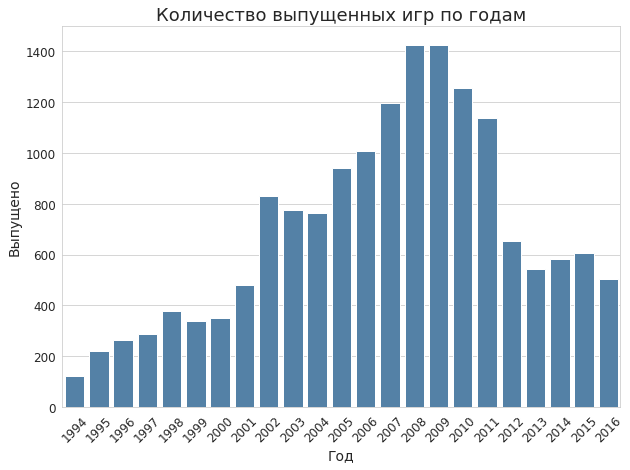

In [ ]:
# строим столбчатый график с отбором нужного периода

sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))

sns.barplot(data=game_per_year.query('year_of_release > 1993'),
            x='year_of_release',
            y='game_count',
            color='steelblue')

plt.title('Количество выпущенных игр по годам', size=18)
plt.xlabel('Год', size=14)
plt.ylabel('Выпущено', size=14)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)

plt.show()

**Вывод**

Бурный рост игр начался с 1994 года, до него были несущественные изменения в выпуске. Тенденция наблюдается положительная с небольшими спадами до 2011 года, пиковое количество было игр выпущено в 2008 и 2009 годах, в 2012 произошёл сильный спад и дальнейшая стагнация до 2016 года.

### Количество проданных игр по платформам

,platform,game_count
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


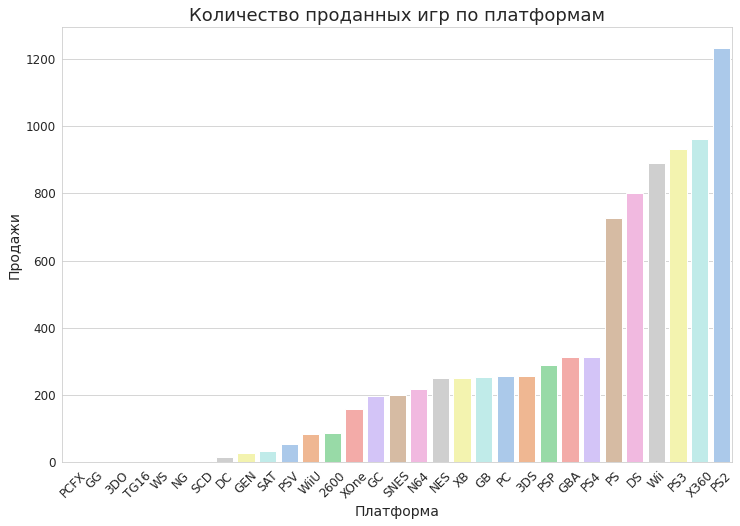

In [ ]:
# смотрим количество проданных игр по всем платформам

platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_sales.reset_index(inplace=True)
platform_sales.columns = ['platform', 'game_count']
platform_sales = platform_sales.sort_values(by='game_count', ascending=False)
display(platform_sales)

sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

sns.barplot(data=platform_sales,
            x='platform',
            y='game_count',
            order=platform_sales.sort_values(by='game_count').platform,
            palette='pastel')

plt.title('Количество проданных игр по платформам', size=18)
plt.xlabel('Платформа', size=14)
plt.ylabel('Продажи', size=14)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)

plt.show()

**Вывод**

Наибольшее количество проданных игр было на PS2, это обуславливается её выходом на рынок и тем, что была прорывом того времени. Другие популярные платформы: X360, PS3, Wii, DS, PS.

In [ ]:
# отбираем топ 4 платформы по продажам игр и для каждой выводим количество продаж по годам

platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
top_platform = list(platform_sales.index[:4])

for x in top_platform:
    platform_sales = data.query('platform == @x').pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    display(platform_sales)
    print()

total_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45

total_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

total_sales
platform year_of_release             
PS3      2006                   20.96
         2007                   73.19
         2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60

total_sales
platform year_of_release             
Wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18

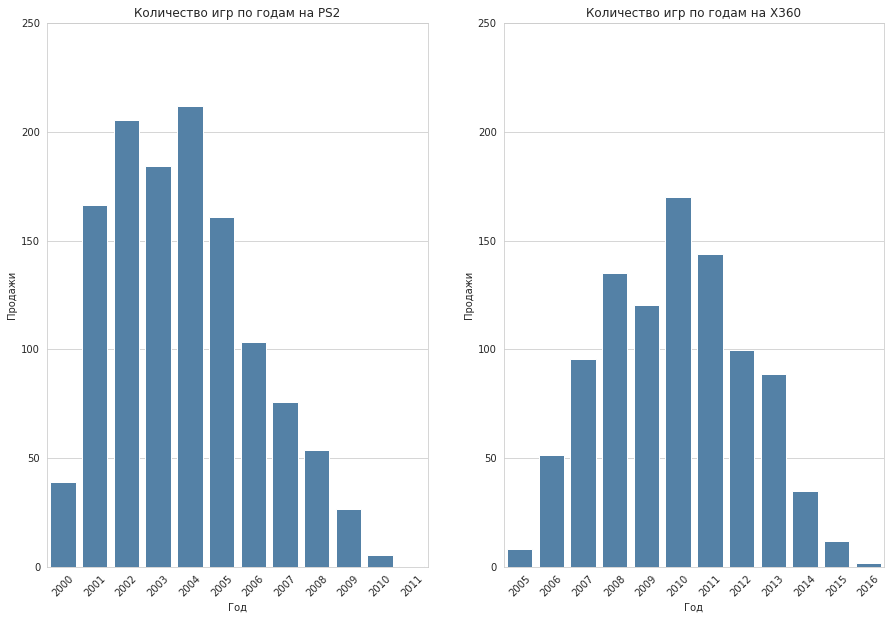

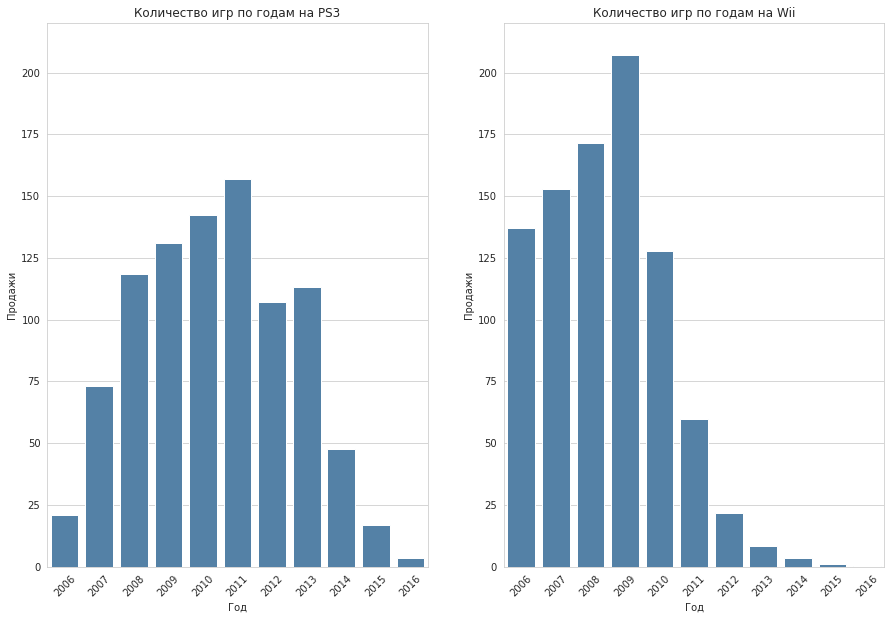

In [ ]:
ps2_sales_per_year = data.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
ps2_sales_per_year.reset_index(inplace=True)
ps2_sales_per_year.columns = ['year_of_release', 'game_count']

x360_sales_per_year = data.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
x360_sales_per_year.reset_index(inplace=True)
x360_sales_per_year.columns = ['year_of_release', 'game_count']

ps3_sales_per_year = data.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
ps3_sales_per_year.reset_index(inplace=True)
ps3_sales_per_year.columns = ['year_of_release', 'game_count']

wii_sales_per_year = data.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
wii_sales_per_year.reset_index(inplace=True)
wii_sales_per_year.columns = ['year_of_release', 'game_count']

# задаём параметры для шаблона графиков

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ymin, ymax = 0, 250


sns.barplot(data=ps2_sales_per_year,
            x='year_of_release',
            y='game_count',
            color='steelblue',
            ax=ax[0])
ax[0].set_ylim(ymin, ymax)
ax[0].set(title='Количество игр по годам на PS2',
          xlabel='Год',
          ylabel='Продажи')
ax[0].tick_params(axis='x', rotation=45)


sns.barplot(data=x360_sales_per_year,
            x='year_of_release',
            y='game_count',
            color='steelblue',
            ax=ax[1])
ax[1].set_ylim(ymin, ymax)
ax[1].set(title='Количество игр по годам на X360',
          xlabel='Год',
          ylabel='Продажи')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

# проделываем то же самое

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ymin, ymax = 0, 220

sns.barplot(data=ps3_sales_per_year,
            x='year_of_release',
            y='game_count',
            color='steelblue',
            ax=ax[0])
ax[0].set_ylim(ymin, ymax)
ax[0].set(title='Количество игр по годам на PS3',
          xlabel='Год',
          ylabel='Продажи')
ax[0].tick_params(axis='x', rotation=45)


sns.barplot(data=wii_sales_per_year,
            x='year_of_release',
            y='game_count',
            color='steelblue',
            ax=ax[1])
ax[1].set_ylim(ymin, ymax)
ax[1].set(title='Количество игр по годам на Wii',
          xlabel='Год',
          ylabel='Продажи')
ax[1].tick_params(axis='x', rotation=45)

**Вывод**

Здесь тоже самое пиковое значение продаж у PS2 в 2004 году, самый резкий старт и спад происходил у Wii.

### Определение актуального периода для прогноза

In [ ]:
# отбираем самый актуальный период на основании стагнации выпуска игр в этот период

actual_data = data.query('year_of_release > 2012')
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,От 17 лет
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,От 17 лет
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,Не определён
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60,Не определён
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,От 17 лет
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,Не определён
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,Не определён
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,Не определён
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,Не определён


**Вывод**

Отобрали именно этот период, потому что он характеризуется стагнацией и в нём отсутствуют аномальные значения, которые могут повлиять на результаты анализа.

### Количество проданных игр по платформам в актуальный период

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


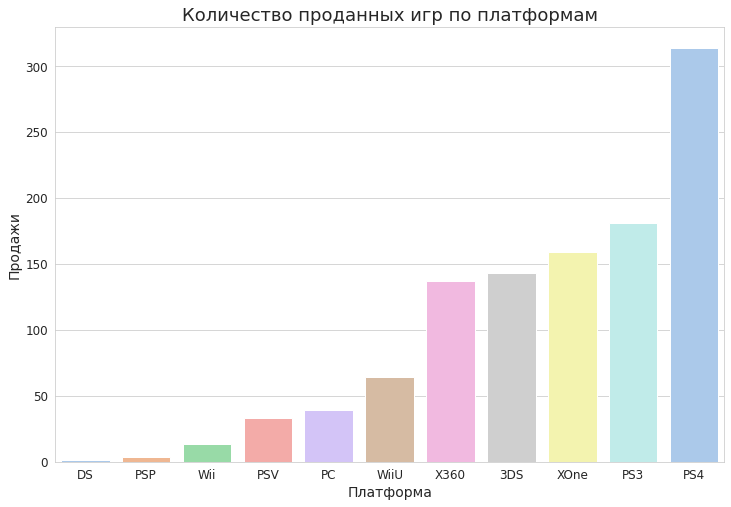

In [ ]:
# для каждой платформы считаем количество проданных игр в актуальный период

actual_platform = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
actual_platform.reset_index(inplace=True)
display(actual_platform.sort_values(by='total_sales', ascending=False))

sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

sns.barplot(data=actual_platform,
            x='platform',
            y='total_sales',
            order=actual_platform.sort_values(by='total_sales').platform,
            palette='pastel')

plt.title('Количество проданных игр по платформам', size=18)
plt.xlabel('Платформа', size=14)
plt.ylabel('Продажи', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

**Вывод**

В актуальный период по количеству проданных игр лидирует PS4, примерно одинаковое количество продаж у PS3, XOne, 3DS, X360.

total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

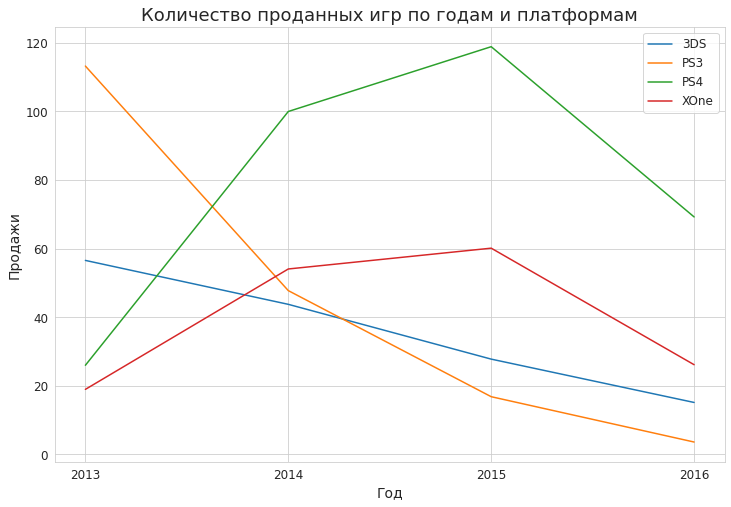

In [ ]:
# сохраняем список топ 4 платформ по продажам игр

top_actual_platform = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                                     .sort_values(by='total_sales', ascending=False)
top_actual_platform = list(top_actual_platform.index[:4])

# для каждой платформы считаем количество проданных игр по годам

actual_platform_data = actual_data.query('platform == @top_actual_platform')

top_actual_platform_per_year = actual_platform_data.pivot_table(index=['platform', 'year_of_release'],
                                                                values='total_sales',
                                                                aggfunc='sum')

display(top_actual_platform_per_year)

sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

sns.lineplot(data=top_actual_platform_per_year,
             x='year_of_release',
             y='total_sales',
             hue='platform')

plt.title('Количество проданных игр по годам и платформам', size=18)
plt.xlabel('Год', size=14)
plt.ylabel('Продажи', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(prop={'size': 12})
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.show()

**Вывод**

В 2013 году лидером была PS3, затем c 2014 позиции поменялись и больше всего продаж у PS4, меньше всего у PS3.

### Распределение продаж игр по платформам

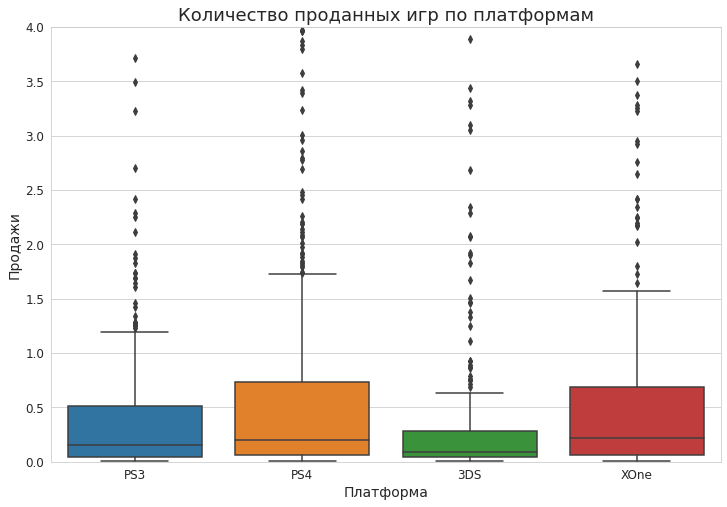

In [ ]:
#

plt.figure(figsize=(12, 8))

sns.boxplot(data=actual_platform_data,
            x='platform',
            y='total_sales')

plt.title('Количество проданных игр по платформам', size=18)
plt.xlabel('Платформа', size=14)
plt.ylabel('Продажи', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylim(0, 4)

plt.show()

**Вывод**

Медианное значение у PS4 и XOne почти одинаково высокое, что делает эти платформы прибыльными. У всех платформ есть большое количество аномалий, которые вызваны большой популярностью игр, их раздачей или тем, что они бесплатные. Верхние квартили у PS3 и 3DS меньше, потому что на них меньше происходят продажи.

### Корреляция продаж и оценок

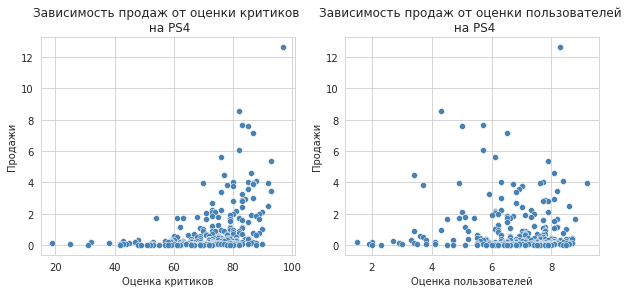

Корреляция продаж и оценки критиков на PS4 составляет: 0.40656790206178095
Корреляция продаж и оценки пользователей на PS4 составляет: -0.031957110204556376


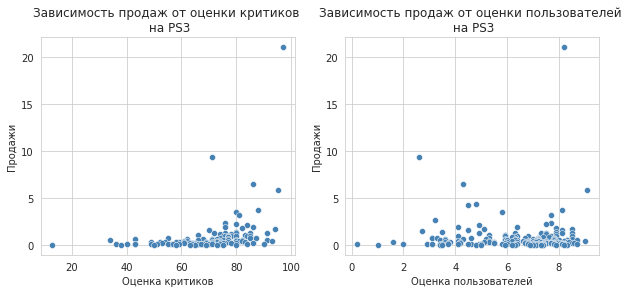

Корреляция продаж и оценки критиков на PS3 составляет: 0.3342853393371919
Корреляция продаж и оценки пользователей на PS3 составляет: 0.0023944027357566925


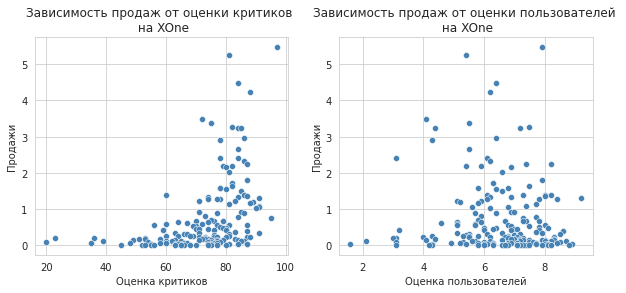

Корреляция продаж и оценки критиков на XOne составляет: 0.4169983280084017
Корреляция продаж и оценки пользователей на XOne составляет: -0.06892505328279414


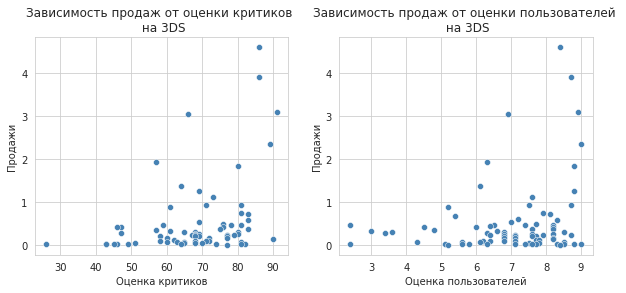

Корреляция продаж и оценки критиков на 3DS составляет: 0.3570566142288103
Корреляция продаж и оценки пользователей на 3DS составляет: 0.24150411773563016


In [ ]:
for platform in top_actual_platform:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    sns.scatterplot(data=actual_platform_data.query('platform == @platform'),
                    x='critic_score',
                    y='total_sales',
                    color='steelblue',
                    ax=ax[0])
    ax[0].set(title=f'Зависимость продаж от оценки критиков \n на {platform}',
              xlabel='Оценка критиков',
              ylabel='Продажи')


    sns.scatterplot(data=actual_platform_data.query('platform == @platform'),
                    x='user_score',
                    y='total_sales',
                    color='steelblue',
                    ax=ax[1])
    ax[1].set(title=f'Зависимость продаж от оценки пользователей \n на {platform}',
              xlabel='Оценка пользователей',
              ylabel='Продажи')

    plt.show()

    corr_data = actual_platform_data.query('platform == @platform')
    print(f'Корреляция продаж и оценки критиков на {platform} составляет:',\
          corr_data['critic_score'].corr(corr_data['total_sales']))
    print(f'Корреляция продаж и оценки пользователей на {platform} составляет:',\
          corr_data['user_score'].corr(corr_data['total_sales']))

**Вывод**

Присутствует незначительная корреляция между оценками критиков и ростом продаж игр.

### Распределение проданных игр по жанрам

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


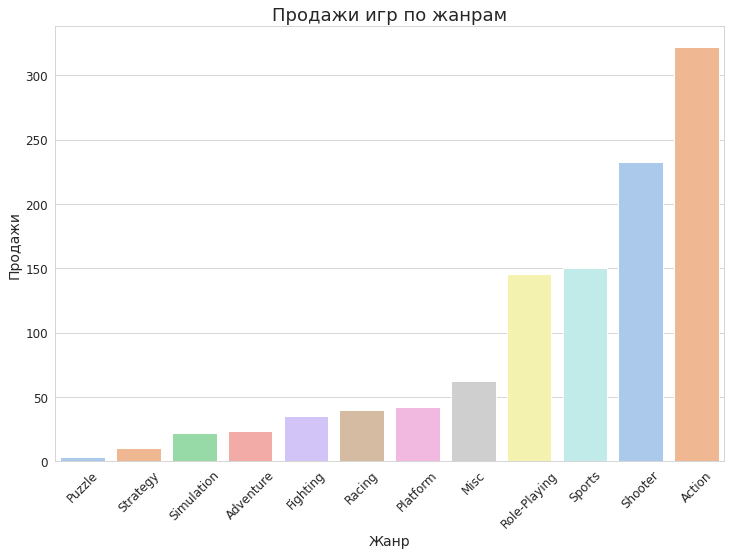

In [ ]:
# количество проданных игр по жанрам

genre_pivot = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
                         .sort_values(by='total_sales', ascending=False)
display(genre_pivot)
genre_pivot.reset_index(inplace=True)

plt.figure(figsize=(12, 8))

sns.barplot(data=genre_pivot,
            x='genre',
            y='total_sales',
            order=genre_pivot.sort_values(by='total_sales').genre,
            palette='pastel')

plt.title('Продажи игр по жанрам', size=18)
plt.xlabel('Жанр', size=14)
plt.ylabel('Продажи', size=14)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)

plt.show()

**Вывод**

Самый продаваемый жанр - экшн, затем идут: шутер, спорт, ролевой.

total_sales
genre        year_of_release             
Action       2013                  122.51
             2014                   97.23
             2015                   72.02
             2016                   30.11
Role-Playing 2013                   44.45
             2014                   45.62
             2015                   37.64
             2016                   18.18
Shooter      2013                   62.04
             2014                   65.21
             2015                   67.51
             2016                   38.22
Sports       2013                   41.17
             2014                   45.15
             2015                   40.84
             2016                   23.49

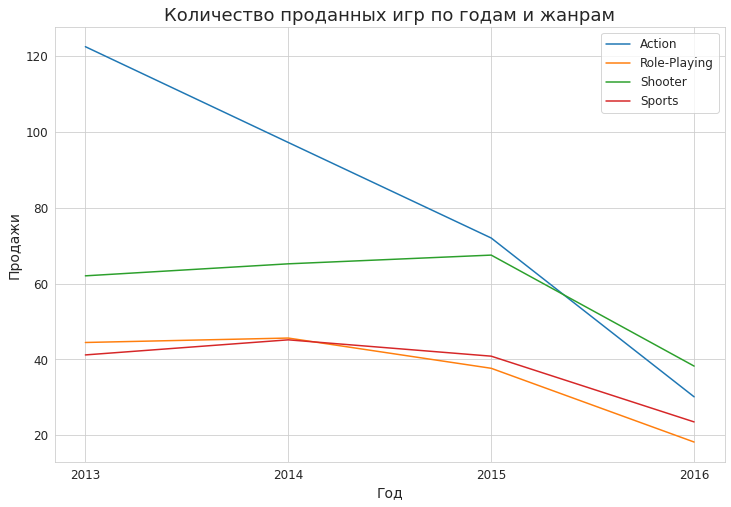

In [ ]:
top_genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
                                     .sort_values(by='total_sales', ascending=False)
top_genre = list(top_genre.index[:4])

# количество проданных игр по годам среди самых популярных жанров

genre_data = actual_data.query('genre == @top_genre')

top_actual_genre_per_year = genre_data.pivot_table(index=['genre', 'year_of_release'],
                                                   values='total_sales',
                                                   aggfunc='sum')

display(top_actual_genre_per_year)


plt.figure(figsize=(12, 8))

sns.lineplot(data=top_actual_genre_per_year,
             x='year_of_release',
             y='total_sales',
             hue='genre')

plt.title('Количество проданных игр по годам и жанрам', size=18)
plt.xlabel('Год', size=14)
plt.ylabel('Продажи', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(prop={'size': 12})
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.show()

**Вывод**

До 2015 года самый прибыльный жанр был экшн, в 2016 почти у всех жанров происходит одинаковое снижение.

total_sales
platform genre                    
3DS      Action              34.04
         Role-Playing        67.37
         Shooter              0.06
         Sports               1.82
PS3      Action              70.92
         Role-Playing        16.49
         Shooter             31.79
         Sports              32.35
PS4      Action              96.10
         Role-Playing        28.99
         Shooter             88.56
         Sports              55.61
XOne     Action              37.31
         Role-Playing        10.55
         Shooter             60.33
         Sports              26.74

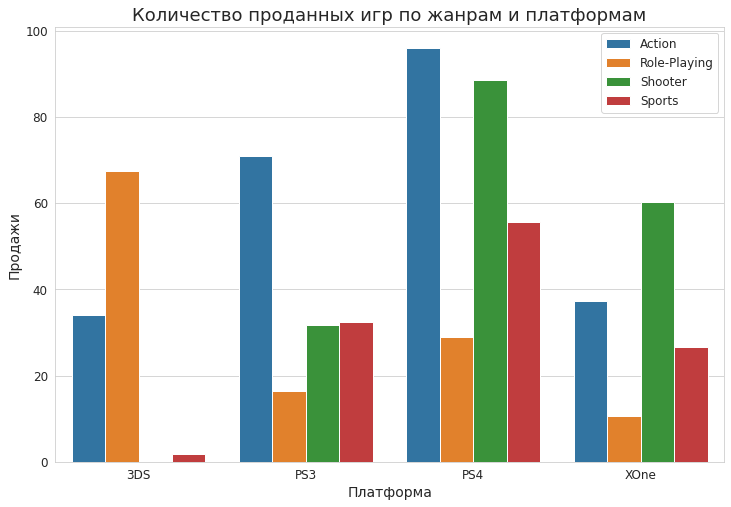

In [ ]:
genre_per_platform = actual_data.query('genre == @top_genre')
genre_per_platform = genre_per_platform.query('platform == @top_actual_platform')

genre_per_platform = genre_per_platform.pivot_table(index=['platform', 'genre'], values='total_sales', aggfunc='sum')
display(genre_per_platform)
genre_per_platform.reset_index(inplace=True)


plt.figure(figsize=(12, 8))

sns.barplot(data=genre_per_platform,
            x='platform',
            y='total_sales',
            hue='genre')

plt.title('Количество проданных игр по жанрам и платформам', size=18)
plt.xlabel('Платформа', size=14)
plt.ylabel('Продажи', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(prop={'size': 12})

plt.show()

total_sales
platform genre                    
3DS      Action           0.293448
         Role-Playing     1.086613
         Shooter          0.060000
         Sports           0.227500
PS3      Action           0.622105
         Role-Playing     0.336531
         Shooter          1.025484
         Sports           0.688298
PS4      Action           0.667361
         Role-Playing     0.568431
         Shooter          2.160000
         Sports           1.208913
XOne     Action           0.438941
         Role-Playing     0.753571
         Shooter          1.587632
         Sports           0.703684

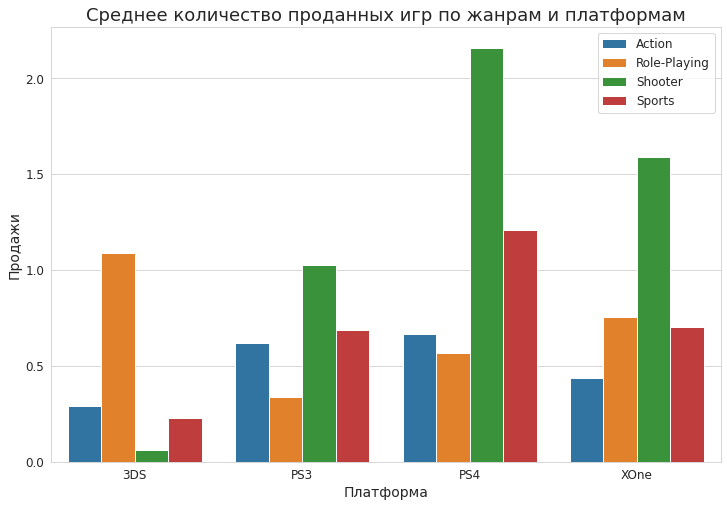

In [ ]:
genre_per_platform = actual_data.query('genre == @top_genre')
genre_per_platform = genre_per_platform.query('platform == @top_actual_platform')

genre_per_platform = genre_per_platform.pivot_table(index=['platform', 'genre'], values='total_sales', aggfunc='mean')
display(genre_per_platform)
genre_per_platform.reset_index(inplace=True)


plt.figure(figsize=(12, 8))

sns.barplot(data=genre_per_platform,
            x='platform',
            y='total_sales',
            hue='genre')

plt.title('Среднее количество проданных игр по жанрам и платформам', size=18)
plt.xlabel('Платформа', size=14)
plt.ylabel('Продажи', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(prop={'size': 12})

plt.show()

total_sales
platform genre                    
3DS      Action              0.070
         Role-Playing        0.175
         Shooter             0.060
         Sports              0.185
PS3      Action              0.165
         Role-Playing        0.120
         Shooter             0.410
         Sports              0.260
PS4      Action              0.155
         Role-Playing        0.200
         Shooter             0.970
         Sports              0.525
XOne     Action              0.150
         Role-Playing        0.320
         Shooter             1.095
         Sports              0.335

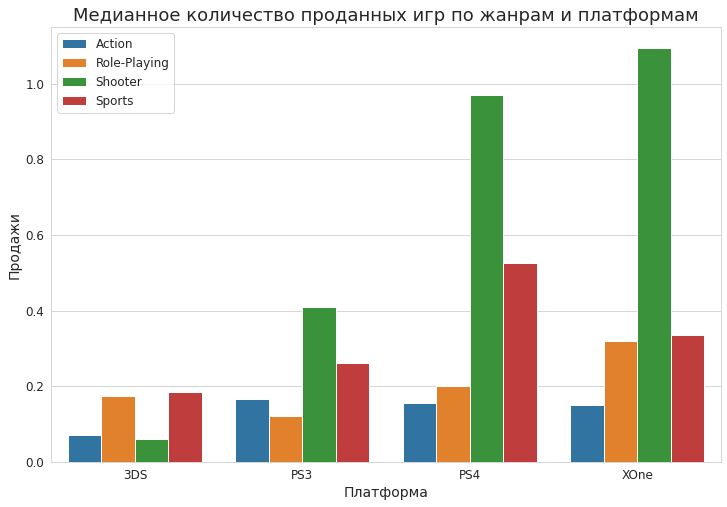

In [ ]:
genre_per_platform = actual_data.query('genre == @top_genre')
genre_per_platform = genre_per_platform.query('platform == @top_actual_platform')

genre_per_platform = genre_per_platform.pivot_table(index=['platform', 'genre'], values='total_sales', aggfunc='median')
display(genre_per_platform)
genre_per_platform.reset_index(inplace=True)


plt.figure(figsize=(12, 8))

sns.barplot(data=genre_per_platform,
            x='platform',
            y='total_sales',
            hue='genre')

plt.title('Медианное количество проданных игр по жанрам и платформам', size=18)
plt.xlabel('Платформа', size=14)
plt.ylabel('Продажи', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(prop={'size': 12})

plt.show()

**Вывод**

Лидером продаж почти на всех платформах является экшн. Меньше всего продаж у role-playing, кроме платформы 3DS, возможно, она предназначена именно для этого жанра, поскольку на ней нет игр в жанре шутер и почти отсутствуют спортивные игры.

Среднее и медианное значение больше всего у шутеров, в этом жанре не было аномально популярных игр. Остальные жанры имеют примерно одинаковое распределение.

**Вывод**

- Больше всего выпущено игр было в 2008 году
- Проданных игр больше всего на PS2
- Актуальный период для анализа 2013-2016
- Наибольшее количество проданных игр в актуальный период - PS4
- Самые прибыльные платформы в актуальный период - PS4 и XOne
- Есть небольшая положительная зависимость проданных игр и оценки критиков на PS4 и XOne
- Самый прибыльный жанр - Action
- В жанре шутер меньше всего было аномальных значений

## Портрет пользователя каждого региона

### Самые популярные платформы в регионах

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96


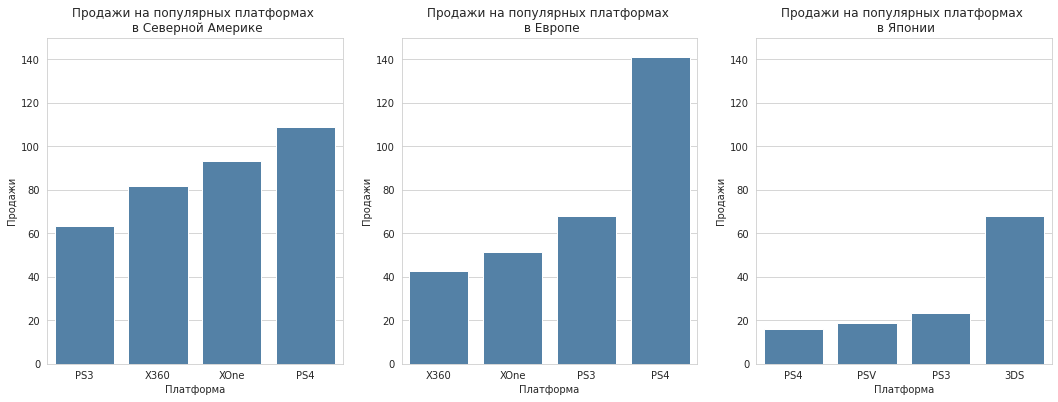

In [ ]:
# отбираем топ 4 платформы по продажам в Северной Америке

na_user = actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
                     .sort_values(by='na_sales', ascending=False)
na_user = na_user.iloc[[0, 1, 2, 3]]
display(na_user)
na_user.reset_index(inplace=True)

# повторяем то же самое для других регионов

eu_user = actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
                     .sort_values(by='eu_sales', ascending=False)
eu_user = eu_user.iloc[[0, 1, 2, 3]]
display(eu_user)
eu_user.reset_index(inplace=True)


jp_user = actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
                     .sort_values(by='jp_sales', ascending=False)
jp_user = jp_user.iloc[[0, 1, 2, 3]]
display(jp_user)
jp_user.reset_index(inplace=True)


fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ymin, ymax = 0, 150

sns.barplot(data=na_user,
            x='platform',
            y='na_sales',
            color='steelblue',
            order=na_user.sort_values(by='na_sales').platform,
            ax=ax[0])
ax[0].set_ylim(ymin, ymax)
ax[0].set(title='Продажи на популярных платформах \n в Северной Америке',
          xlabel='Платформа',
          ylabel='Продажи')

sns.barplot(data=eu_user,
            x='platform',
            y='eu_sales',
            color='steelblue',
            order=eu_user.sort_values(by='eu_sales').platform,
            ax=ax[1])
ax[1].set_ylim(ymin, ymax)
ax[1].set(title='Продажи на популярных платформах \n в Европе',
          xlabel='Платформа',
          ylabel='Продажи')

sns.barplot(data=jp_user,
            x='platform',
            y='jp_sales',
            color='steelblue',
            order=jp_user.sort_values(by='jp_sales').platform,
            ax=ax[2])
ax[2].set_ylim(ymin, ymax)
ax[2].set(title='Продажи на популярных платформах \n в Японии',
          xlabel='Платформа',
          ylabel='Продажи')

plt.show()

**Вывод**

Лидером в СА и Европе по-прежнему является PS4. В Японии спросом пользуется 3DS, это может быть связано с целевой аудиторией и типом выпускаемых на неё игр.

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65


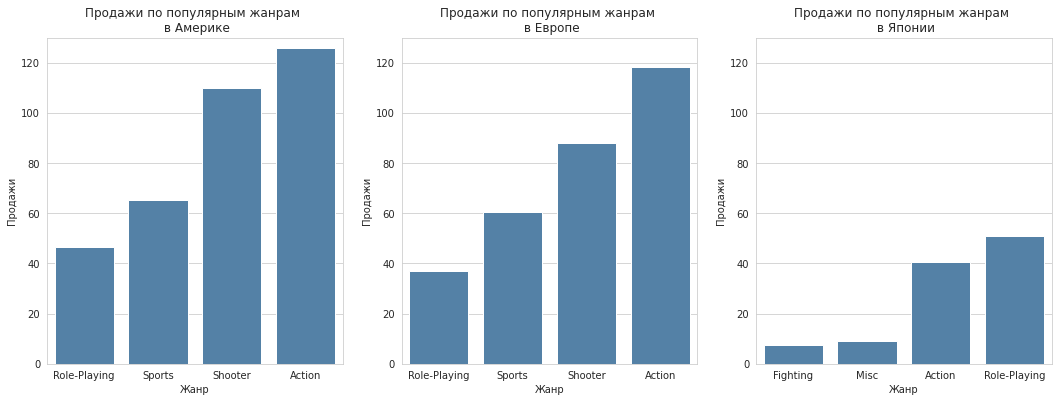

In [ ]:
na_user = actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
                     .sort_values(by='na_sales', ascending=False)
na_user = na_user.iloc[[0, 1, 2, 3]]
display(na_user)
na_user.reset_index(inplace=True)


eu_user = actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
                     .sort_values(by='eu_sales', ascending=False)
eu_user = eu_user.iloc[[0, 1, 2, 3]]
display(eu_user)
eu_user.reset_index(inplace=True)


jp_user = actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
                     .sort_values(by='jp_sales', ascending=False)
jp_user = jp_user.iloc[[0, 1, 2, 3]]
display(jp_user)
jp_user.reset_index(inplace=True)


fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ymin, ymax = 0, 130

sns.barplot(data=na_user,
            x='genre',
            y='na_sales',
            color='steelblue',
            order=na_user.sort_values(by='na_sales').genre,
            ax=ax[0])
ax[0].set_ylim(ymin, ymax)
ax[0].set(title='Продажи по популярным жанрам \n в Америке',
          xlabel='Жанр',
          ylabel='Продажи')

sns.barplot(data=eu_user,
            x='genre',
            y='eu_sales',
            color='steelblue',
            order=eu_user.sort_values(by='eu_sales').genre,
            ax=ax[1])
ax[1].set_ylim(ymin, ymax)
ax[1].set(title='Продажи по популярным жанрам \n в Европе',
          xlabel='Жанр',
          ylabel='Продажи')

sns.barplot(data=jp_user,
            x='genre',
            y='jp_sales',
            color='steelblue',
            order=jp_user.sort_values(by='jp_sales').genre,
            ax=ax[2])
ax[2].set_ylim(ymin, ymax)
ax[2].set(title='Продажи по популярным жанрам \n в Японии',
          xlabel='Жанр',
          ylabel='Продажи')

plt.show()

**Вывод**

Action лидирует в СА и Европе, потому что это самый продаваемый жанр на PS4, а в Японии, следовательно, ролевой жанр, который преимущественно выпускается на 3DS.

,na_sales
ratings,
От 17 лет,165.21
Не определён,89.42
От 6 лет,79.05
От 10 лет,54.24
От 13 лет,49.79


,eu_sales
ratings,
От 17 лет,145.32
От 6 лет,83.36
Не определён,78.91
От 10 лет,42.69
От 13 лет,41.95


,jp_sales
ratings,
Не определён,85.05
От 13 лет,20.59
От 6 лет,15.14
От 17 лет,14.11
От 10 лет,5.89


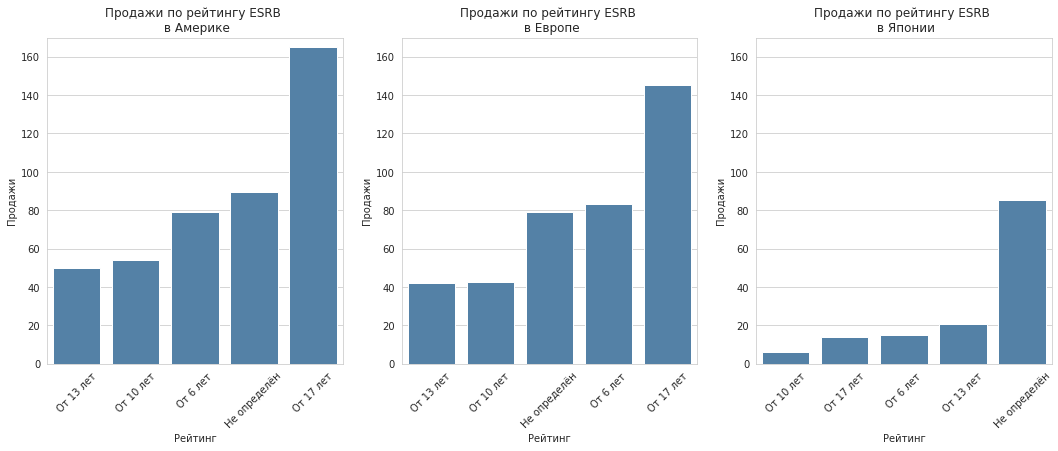

In [ ]:
na_rat = actual_data.pivot_table(index='ratings', values='na_sales', aggfunc='sum')\
                     .sort_values(by='na_sales', ascending=False)
display(na_rat)
na_rat.reset_index(inplace=True)


eu_rat = actual_data.pivot_table(index='ratings', values='eu_sales', aggfunc='sum')\
                     .sort_values(by='eu_sales', ascending=False)
display(eu_rat)
eu_rat.reset_index(inplace=True)


jp_rat = actual_data.pivot_table(index='ratings', values='jp_sales', aggfunc='sum')\
                     .sort_values(by='jp_sales', ascending=False)
display(jp_rat)
jp_rat.reset_index(inplace=True)


fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ymin, ymax = 0, 170

sns.barplot(data=na_rat,
            x='ratings',
            y='na_sales',
            color='steelblue',
            order=na_rat.sort_values(by='na_sales').ratings,
            ax=ax[0])
ax[0].set_ylim(ymin, ymax)
ax[0].set(title='Продажи по рейтингу ESRB \n в Америке',
          xlabel='Рейтинг',
          ylabel='Продажи')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(data=eu_rat,
            x='ratings',
            y='eu_sales',
            color='steelblue',
            order=eu_rat.sort_values(by='eu_sales').ratings,
            ax=ax[1])
ax[1].set_ylim(ymin, ymax)
ax[1].set(title='Продажи по рейтингу ESRB \n в Европе',
          xlabel='Рейтинг',
          ylabel='Продажи')
ax[1].tick_params(axis='x', rotation=45)

sns.barplot(data=jp_rat,
            x='ratings',
            y='jp_sales',
            color='steelblue',
            order=jp_rat.sort_values(by='jp_sales').ratings,
            ax=ax[2])
ax[2].set_ylim(ymin, ymax)
ax[2].set(title='Продажи по рейтингу ESRB \n в Японии',
          xlabel='Рейтинг',
          ylabel='Продажи')
ax[2].tick_params(axis='x', rotation=45)

plt.show()

**Вывод**

Большинство игр в СА и Европе покупают с возрастным ограничением от 17 лет, которые ставят в большинстве на action и shooter игры. У японцев преобладает рейтинг от 13 лет, который присущ role-playing играм.

**Вывод**

Портрет пользователя Северной Америке и Европы очень схож:

 - Старше 17 лет (не факт)
 - Играет на PS4 (и XOne для СА)
 - Предпочитает Action и Shooter игры

Портрет японского геймера:

 - Старше 13 лет
 - Играет на 3DS
 - Предпочитает Role-Playing игры

## Проверка гипотез

### Одинаковы ли средние пользовательские рейтинги на XOne и PC

`H0`: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

`H1`: средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [ ]:
# отбираем массивы в отдельные переменные с выбором нужной платформы и пользовательским рейтингом больше нуля

XOne = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
PC = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score']

print('Средняя оценка пользователей XOne:', XOne.mean())
print('Средняя оценка пользователей PC:', PC.mean())

Средняя оценка пользователей XOne: 6.521428571428572
Средняя оценка пользователей PC: 6.2696774193548395


In [ ]:
# задаём пороговое значение и проверяем две независимые выборки

alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.14759594013430463
Нет оснований отвергнуть нулевую гипотезу


**Вывод**

Нулевая гипотеза не отвергнута, средние пользовательские рейтинги на платформах XOne и PC одинаковые.

### Различаются ли средние пользовательские рейтинги жанров Action и Sports

`H0`: cредние пользовательские рейтинги жанров Action и Sports одинаковые

`H1`: cредние пользовательские рейтинги жанров Action и Sports не одинаковые

In [ ]:
action = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']
sports = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']

print('Средняя оценка пользователей XOne:', action.mean())
print('Средняя оценка пользователей PC:', sports.mean())

Средняя оценка пользователей XOne: 6.837532133676092
Средняя оценка пользователей PC: 5.238124999999999


In [ ]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод**

Нулевая гипотеза отвергнута, поэтому средние пользовательские рейтиги жанров Action и Sports различаются.

# Общий вывод

Задачей проекта было выявление закономерностей, определяющих успешность игр (их продаваемость).

**Этапы проекта:**

1. Изучение датафрейма
 - Выгрузка
 - Изучение общей информации


2. Предобработка данных
 - Приведение к правильному виду названия столбцов, данные в столбцах
 - Удаление пропусков
 - Добавление вспомогательных столбцов


3. Анализ данных
 - Расчёт количества выпущенных игр по годам
 - Определение периода для объективного прогноза
 - Выявление успешных платформ, жанров и годов


4. Составление портрета пользователя региона
 - Анализ самых популярных платформ и жанром по регионам
 - Влияние рейтинга на продажи в регионах


5. Проверка гипотез

**В результате анализа были сделаны следующие выводы:**

- Больше всего выпущено игр было в 2008 году
- Проданных игр больше всего на PS2
- Актуальный период для анализа 2013-2016
- Наибольшее количество проданных игр в актуальный период - PS4
- Самые прибыльные платформы в актуальный период - PS4 и XOne
- Есть небольшая положительная зависимость проданных игр и оценки критиков на PS4 и XOne
- Самый прибыльный жанр - Action
- В жанре шутер меньше всего было аномальных значений

**Портрет геймеров по регионам**

`Северная Америка`

 - Старше 17 лет
 - Играет на PS4 и XOne
 - Предпочитает Action и Shooter игры

`Европа`

 - Старше 17 лет
 - Играет на PS4
 - Предпочитает Action и Shooter игры

`Япония`

 - Старше 13 лет
 - Играет на 3DS
 - Предпочитает Role-Playing игры

**Результаты проверки гипотез**

Средние пользовательские оценки на платформах XOne и PC одинаковые, но средние пользовательские рейтинги жанров Action и Sports различаются.

**Рекомендации**

Прибыльнее всего будет выпускать игры под целевую аудиторию Северной Америки, поэтому надо игры на **`PS4`** и **`XOne`** в жанрах **`Action`** и **`Shooter`**, тем самым можно ещё охватить очень большую часть европейского рынка и часть Японии.

При выборе японского сегмента, необходимо ориентироваться на платформы **`3DS`** и **`PS4`** (несмотря на то, что у PS3 больше продаж) и жанры: **`Role-Playing`**, **`Action`**.